# Calculus - Intro to Derivatives

We are going to look at how to solve derivatives of polynomials



Tutor: Anthropic's AI, Claude

References:

Essential Calculus Skills Practice Workbook - Chris McMullen
* https://www.mcleanandeakin.com/book/9781941691243

Wolfram Alpha
* https://www.wolframalpha.com

SymPy
* https://www.sympy.org/en/index.html

SymPy Calculus example
* https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html

Matplotlib
* https://matplotlib.org/stable/api/pyplot_summary.html

Matplotlib graphing example
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Markdown formatting methods
* dollar sign x ^ m dollar sign
* dollar sign x ^ {m+n} dollar sign

Useful algebra rules

* 1/$x^n$ = $x^{-n}$
* $\sqrt(x)$ = x$^{1/2}$
* $x^0$ = 1
* $x^m$$x^n$ = $x^{m+n}$
* $x^m$/$x^n$ = $x^{m-n}$
* ($x^m$)$^n$ = $x^{mn}$
* (ax)$^m$ = $a^m$$x^m$
*  $\sqrt(ax)$ = (ax)$^{1/2}$ = $a^{1/2}$$x^{1/2}$


A function assigns each element of a set (a mathematical collection of things) X to exactly one element of a set Y.





Let's graph the function f(x) = $(4+x)^9$ $(2-x)^5$ with matplotlib:

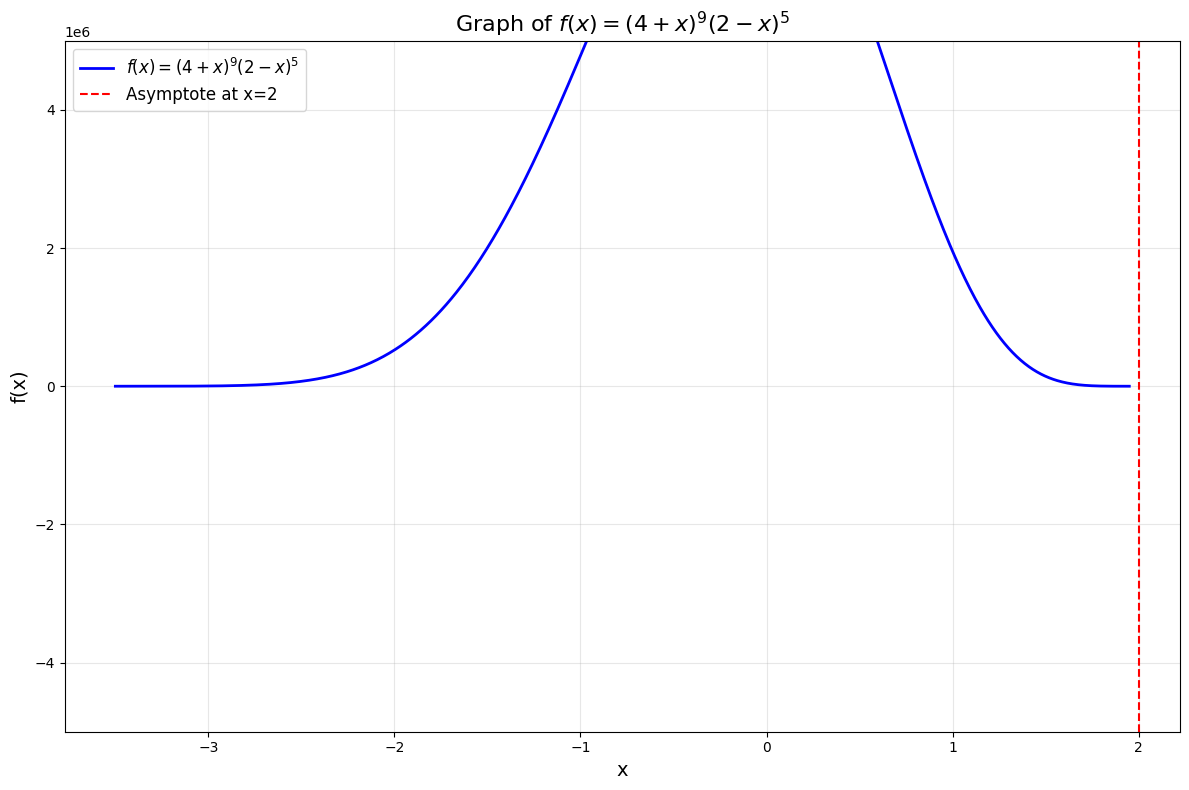

In [2]:
# Made by Anthropic's AI Claude

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Define the original function
def f(x):
    return (4+x)**9 * (2-x)**5

# Define the derivative analytically
def f_prime(x):
    return 9*(4+x)**8*(2-x)**5 - 5*(4+x)**9*(2-x)**4

# Create x values (being careful to avoid the singularity at x=2)
x_values = np.linspace(-3.5, 1.95, 1000)

# Calculate function values
y_values = [f(x) for x in x_values]

# Create plot
plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values, 'b-', linewidth=2, label=r'$f(x) = (4+x)^9(2-x)^5$')

# Add vertical asymptote at x=2
plt.axvline(x=2, color='r', linestyle='--', label='Asymptote at x=2')

# Add aesthetic elements
plt.title('Graph of $f(x) = (4+x)^9(2-x)^5$', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Set reasonable axis limits
plt.ylim(-5e6, 5e6)  # Adjust as needed

plt.tight_layout()
plt.show()

Derivatives are a method to measure the rate of change

Useful derivative rules:
* d/dx(C) = 0, where C = constant
* d/dx (ax^b) = bax^b-1
* df/dx = (df/du)(du/dx)
* d/dx(f,g) = g(df/dx) + f(dg/dx)
* d/dx(f,g) = g(df/dx)(du/dx) + f(dg/dx)(dv/dx)

Let's take the derivative of the function h(x) = $(4+x)^9$ $(2-x)^5$

Given:
* d/dx(f,g) = g(df/dx)(du/dx) + f(dg/dx)(dv/dx)
* f(x) = (4+x)^9
* g(x) = (2-x)^5
* u = (4+x)
* f = (u^9)
* v = (2-x)
* g = (v^5)

Find: d/dx ($(4+x)^9$ $(2-x)^5$) = ?

Solution:
* d/dx ($(4+x)^9$ $(2-x)^5$) = [(2-x)^5][df/dx(u^9)[du/dx(4+x)] + [(4+x)^9][dg/dv(v^5)]{dv/dx(2-x)]
* d/dx ($(4+x)^9$ $(2-x)^5$) = [(2-x)^5][9u^8][1] + [(4+x)^9][5v^4][-1]
* d/dx ($(4+x)^9$ $(2-x)^5$) =  9u^8(2-x)^5 - 5v^4(4+x)^9
* d/dx ($(4+x)^9$ $(2-x)^5$) = 9[(4+x)^8][(2-x)^5] - 5[(2-x)^4][(4+x)^9]


Let's check our result with the SymPy library

<ipython-input-3-e460f27ea130>:17: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(f, x, dx=1e-6)


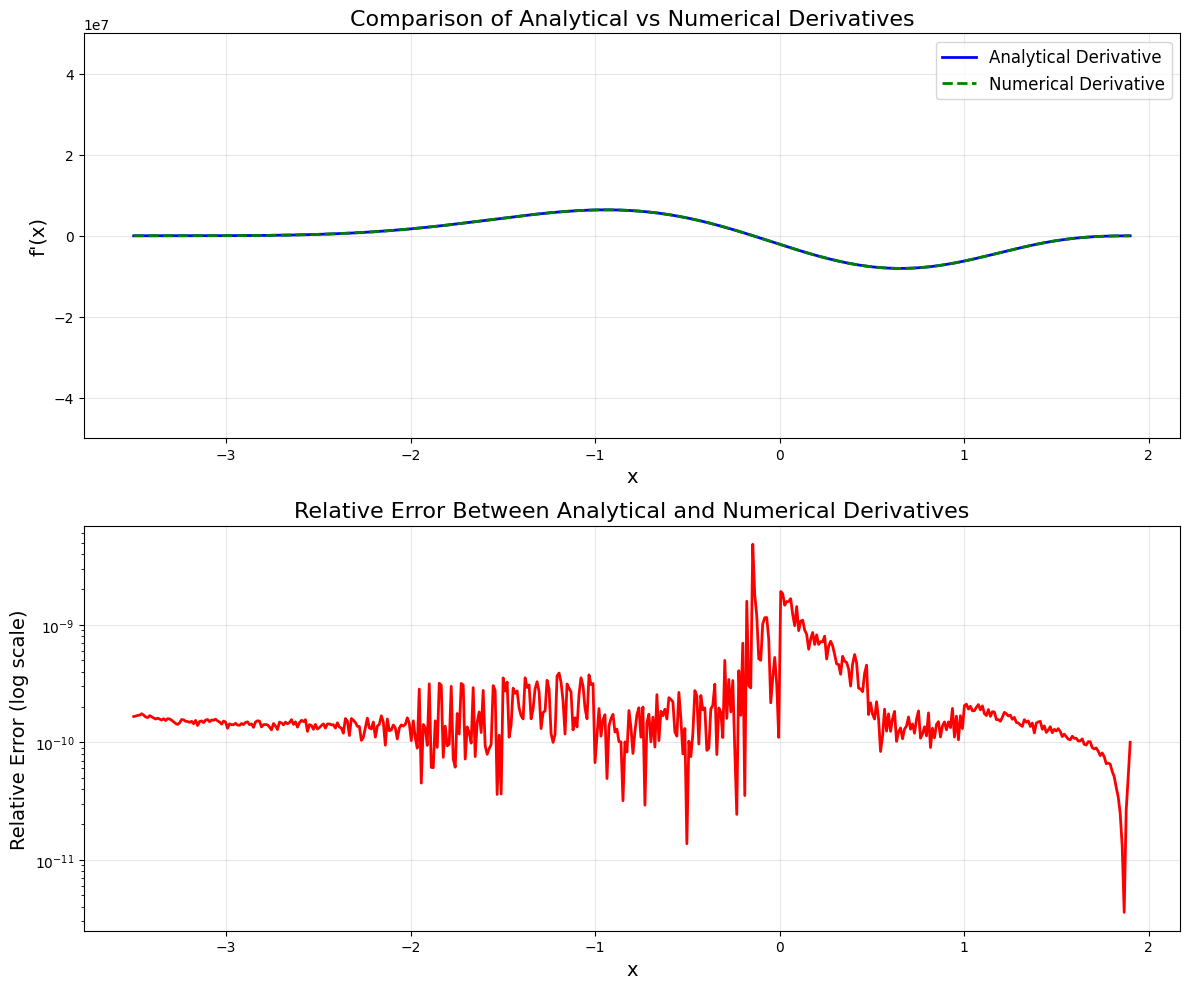

Comparison at sample points:
x         Analytical          Numerical           Relative Error 
-----------------------------------------------------------------
-3        2.50000000e+04      2.50000000e+04      1.49157131e-10 
-1        6.37729200e+06      6.37729200e+06      1.80997475e-10 
0         -2.09715200e+06     -2.09715200e+06     1.19248966e-09 
1         -6.25000000e+06     -6.25000000e+06     5.58793545e-11 
1.5       -1.20367536e+06     -1.20367536e+06     1.12092154e-10 


In [3]:
# Made by Anthropic's AI Claude

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Define the original function
def f(x):
    return (4+x)**9 * (2-x)**5

# Define the derivative analytically
def f_prime_analytical(x):
    return 9*(4+x)**8*(2-x)**5 - 5*(4+x)**9*(2-x)**4

# Use scipy to calculate numerical derivative
def f_prime_numerical(x):
    return derivative(f, x, dx=1e-6)

# Create x values (avoiding x=2 where the function has issues)
x_values = np.linspace(-3.5, 1.9, 500)

# Calculate analytical and numerical derivatives
analytical_derivatives = [f_prime_analytical(x) for x in x_values]
numerical_derivatives = [f_prime_numerical(x) for x in x_values]

# Calculate the relative error between analytical and numerical derivatives
relative_errors = [abs((a-n)/a) if abs(a) > 1e-10 else abs(a-n)
                  for a, n in zip(analytical_derivatives, numerical_derivatives)]

# Create plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot both derivatives
ax1.plot(x_values, analytical_derivatives, 'b-', linewidth=2, label='Analytical Derivative')
ax1.plot(x_values, numerical_derivatives, 'g--', linewidth=2, label='Numerical Derivative')
ax1.set_title('Comparison of Analytical vs Numerical Derivatives', fontsize=16)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('f\'(x)', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12)
ax1.set_ylim(-5e7, 5e7)  # Adjust as needed

# Plot relative error
ax2.semilogy(x_values, relative_errors, 'r-', linewidth=2)
ax2.set_title('Relative Error Between Analytical and Numerical Derivatives', fontsize=16)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('Relative Error (log scale)', fontsize=14)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print comparison at a few sample points
print("Comparison at sample points:")
sample_points = [-3, -1, 0, 1, 1.5]
print(f"{'x':<10}{'Analytical':<20}{'Numerical':<20}{'Relative Error':<15}")
print("-" * 65)
for x in sample_points:
    a = f_prime_analytical(x)
    n = f_prime_numerical(x)
    err = abs((a-n)/a) if abs(a) > 1e-10 else abs(a-n)
    print(f"{x:<10}{a:<20.8e}{n:<20.8e}{err:<15.8e}")

**Claude's review and comment**

Good evening! I'd be happy to review the solution for finding the derivative of the function f(x) = (4+x)^9(2-x)^5.

Looking at the solution, I notice that there's a misconception in how the product rule is being applied. The product rule states that if h(x) = f(x)g(x), then h'(x) = f'(x)g(x) + f(x)g'(x).

Let me work through this more carefully:

If we define h(x) = (4+x)^9(2-x)^5, then:
- f(x) = (4+x)^9
- g(x) = (2-x)^5

The derivative is:
h'(x) = f'(x)g(x) + f(x)g'(x)

For f'(x), we use the chain rule:
f'(x) = 9(4+x)^8 · (1) = 9(4+x)^8

For g'(x), we also use the chain rule:
g'(x) = 5(2-x)^4 · (-1) = -5(2-x)^4

Now applying the product rule:
h'(x) = 9(4+x)^8(2-x)^5 + (4+x)^9(-5)(2-x)^4
     = 9(4+x)^8(2-x)^5 - 5(4+x)^9(2-x)^4

This matches your final answer, so your solution is correct! You've properly applied both the product rule and chain rule to find the derivative.

A derivative can be also described using words
> * derive [ equation ] with respect to [ variable ]
> * [ equation ] = f(x) = $(4+x)^9$ $(2-x)^5$
> * [ variable ] = x
> * derive [ f(x) ] with respect to [ x ]

Let's calculate and graph the derivative using Wolfram Alpha
* f'(x) = 9 (2 - x)^5 (x + 4)^8 - 5 (2 - x)^4 (x + 4)^9
* f'(x) = -2 (x - 2)^4 (x + 4)^8 (7 x + 1)